## Heart Disease Predictive Modeling
The purpose of this notebook is to analyse the [Cardiovascular Study Dataset](https://www.kaggle.com/datasets/anthonypino/melbourne-housing-market?select=Melbourne_housing_FULL.csv) and create a logistic regression model to predict Heart Disease of Patients.

## 1. Problem Statement
The goal is to predict the likelihood of a patient developing coronary heart disease (CHD) within 10 years using demographic, behavioral, and medical data. This is a binary classification problem.

## 2. Importing Libraries

In [1]:
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score , precision_score , recall_score, f1_score, precision_recall_curve


# Ignore warnings for cleaner output
warnings.filterwarnings('ignore')

##  3. Data Loading and Cleaning
The dataset folder contains both a training dataset and test dataset. We will be working on the training dataset now and the test dataset later

In [2]:
training_data= pd.read_csv(r"C:\Users\DELL\Downloads\Heart Disease Model\train.csv")

In [3]:
training_data.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [4]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

This shows there are significant null values in our training dataset 

In [5]:
training_data=training_data.drop('id',axis=1)

The age and is_smoking columns need to be changed to numeric values

In [6]:
training_data['sex'] = training_data['sex'].map({'M': 1, 'F': 2})
training_data['is_smoking'] = training_data['is_smoking'].map({'YES':1, 'NO':0})

In [7]:
training_data.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,2,1,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,2,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,2,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


## 4. Exploratory Data Analysis (EDA)

In [50]:
""" Splitting the columns in to categorical and numerical variable"""
numeric_columns = training_data[['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']].columns.tolist()
categorical_columns = training_data[['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']].columns.tolist()
target_column = training_data['TenYearCHD']

### Distribution of the target variable

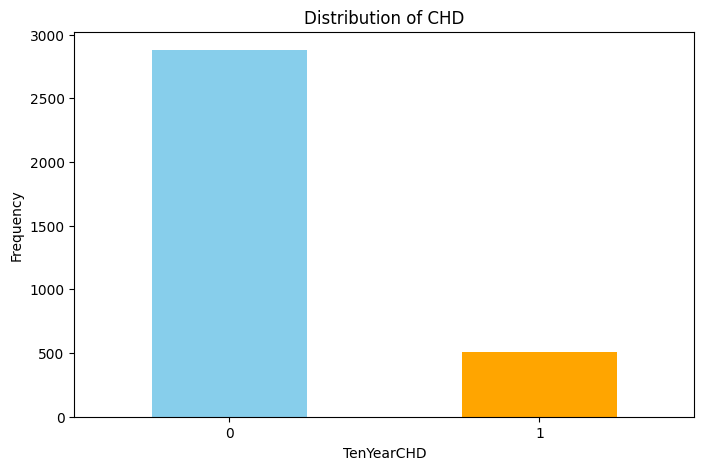

In [13]:
plt.figure(figsize=(8, 5))
training_data['TenYearCHD'].value_counts().plot(
    kind='bar', color=['skyblue', 'orange']
)
plt.title('Distribution of CHD')
plt.xlabel('TenYearCHD')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

The distribution shows that a high proportion of individuals do not have coronary heart disease (CHD)

### Distribution plots for numeric variables

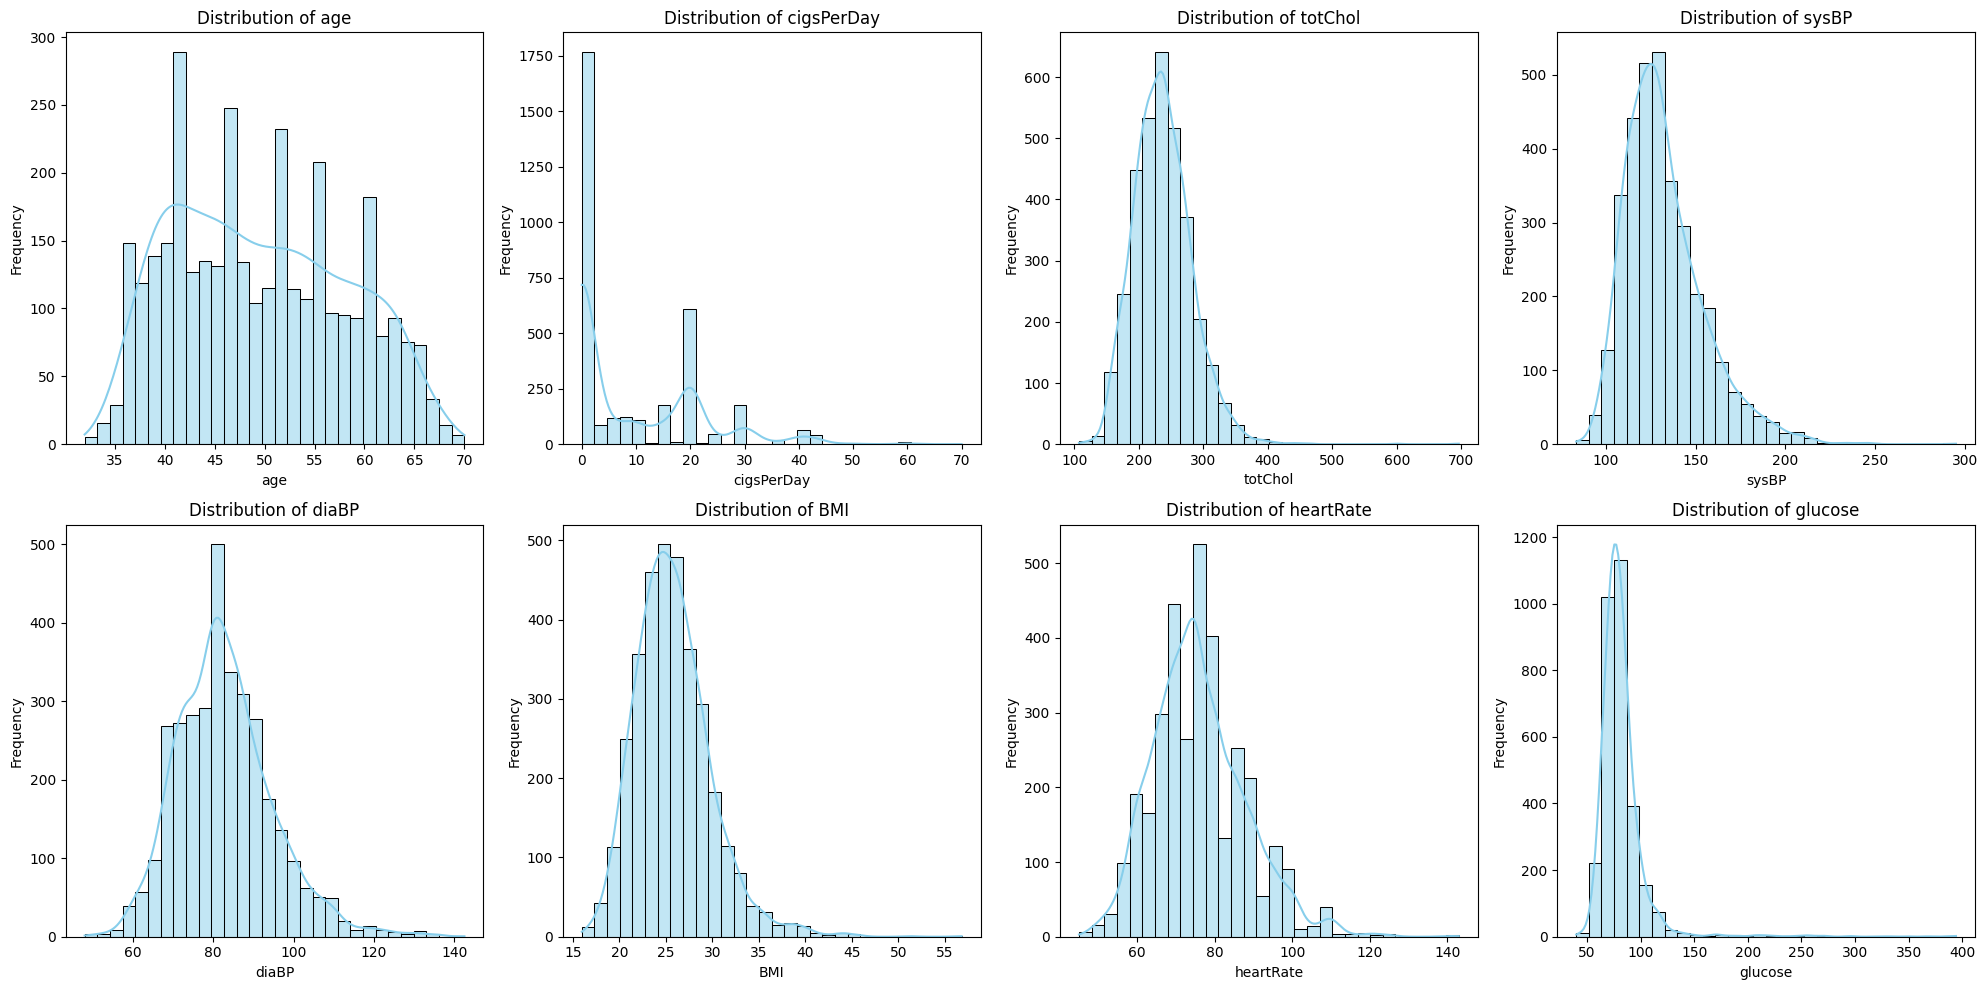

In [14]:
fig, axs = plt.subplots(2, 4, figsize=(20, 10)) 

for i, col in enumerate(numeric_columns): 
    row, col_idx = divmod(i, 4) 
    sns.histplot(training_data[col], kde=True, bins=30, color='skyblue', ax=axs[row, col_idx]) 
    axs[row, col_idx].set_title(f'Distribution of {col}')
    axs[row, col_idx].set_xlabel(col)
    axs[row, col_idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


### Brief Overview
The visualizations provide key insights into the dataset, helping guide the preparation of features for building a classification model:

- The **age distribution** is centered around middle-aged individuals (40–65), suggesting the model will focus on a population at higher risk for chronic diseases.  
- **Cigarettes per day (cigsPerDay)** shows a highly skewed distribution, with most individuals smoking little or none. This feature may benefit from log transformation or binning to better capture its impact on the target variable.  
- **Total cholesterol (totChol)** and **glucose levels** have strong right-skewness, with significant outliers. These features may need scaling or transformation to reduce their influence on the model.  
- **Systolic (sysBP)** and **diastolic blood pressure (diaBP)** follow relatively normal distributions with some high-value outliers. These are likely important predictors of cardiovascular health and should be carefully treated for missing or extreme values.  
- The **BMI** and **heart rate** distributions are approximately normal, but with noticeable tails that might represent unhealthy individuals. These features are likely directly relevant for classification.  

### Summary

The visualizations offer valuable insights into the dataset's key features, highlighting their relevance for building a classification model. The age distribution focuses on middle-aged individuals, a critical demographic for assessing chronic disease risks. Features such as cholesterol, glucose, and blood pressure levels reveal potential patterns associated with cardiovascular health, with elevated values aligning with known risk factors. The skewed distributions of smoking behavior and glucose levels, along with BMI and heart rate variations, further emphasize the need for careful preprocessing to ensure these features contribute effectively to the model's predictive power.



### Distribution plots for categorical variables

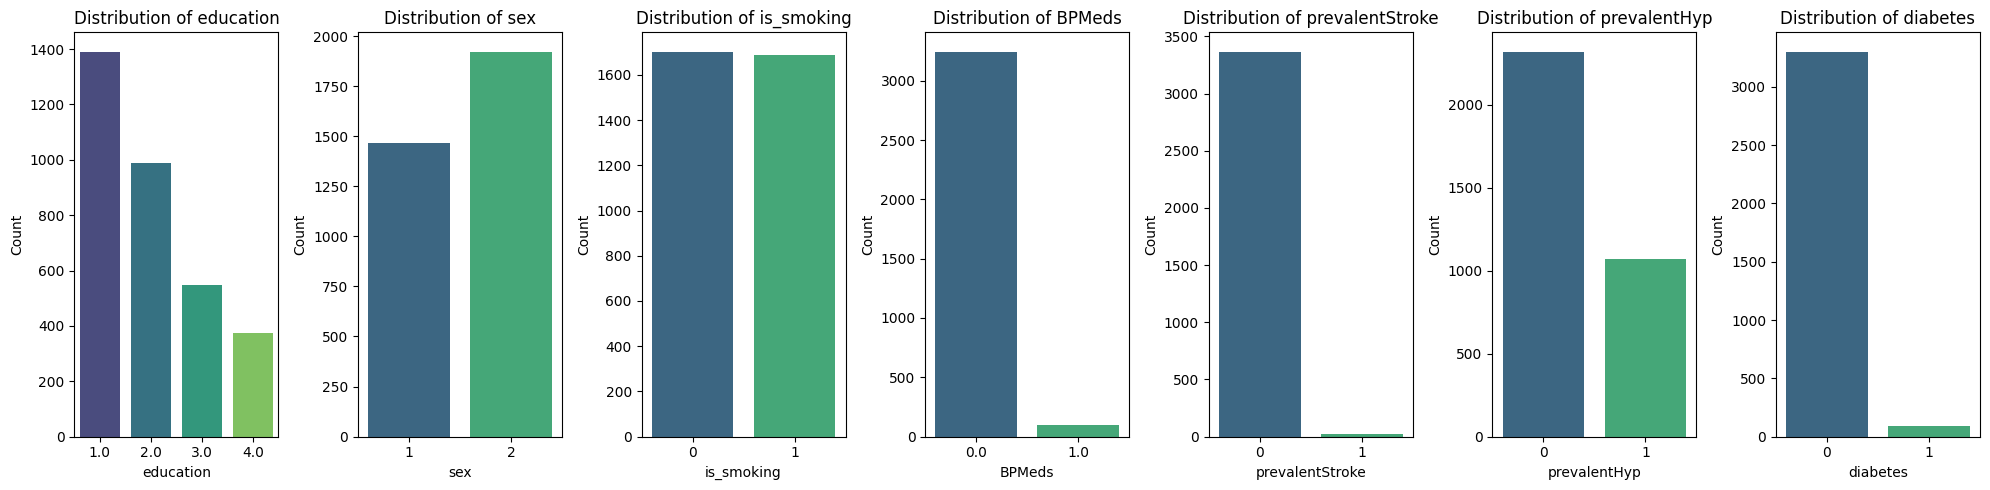

In [15]:
fig, axs = plt.subplots(1, len(categorical_columns), figsize=(20, 5))

for i, col in enumerate(categorical_columns):
    sns.countplot(data=training_data, x=col, hue=None, palette='viridis', ax=axs[i]) 
    axs[i].set_title(f'Distribution of {col}')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Count')

plt.tight_layout()
plt.show()


### Summary

The visualizations provide a detailed overview of categorical variables, offering crucial insights for constructing a classification model. The **education** variable shows a majority of individuals with the lowest education level (category 1), while the higher education levels (categories 3 and 4) are less frequent. The **sex** distribution is relatively balanced, ensuring equal representation of male and female participants. Similarly, the **is_smoking** variable is evenly distributed, indicating a balanced mix of smokers and non-smokers.

The **BPMeds** (blood pressure medication) variable indicates that most individuals are not on medication, with a small fraction relying on it. The **prevalentStroke** and **diabetes** variables reveal an overwhelming majority without these conditions, signifying their rarity in the dataset. However, **prevalentHyp** (hypertension) is more common, with a significant portion of individuals reporting its presence. These patterns highlight key categorical features to include in the model, with adjustments for class imbalance where necessary.


### Comparision of Numerical features and the target feature( which is to predict CHD)

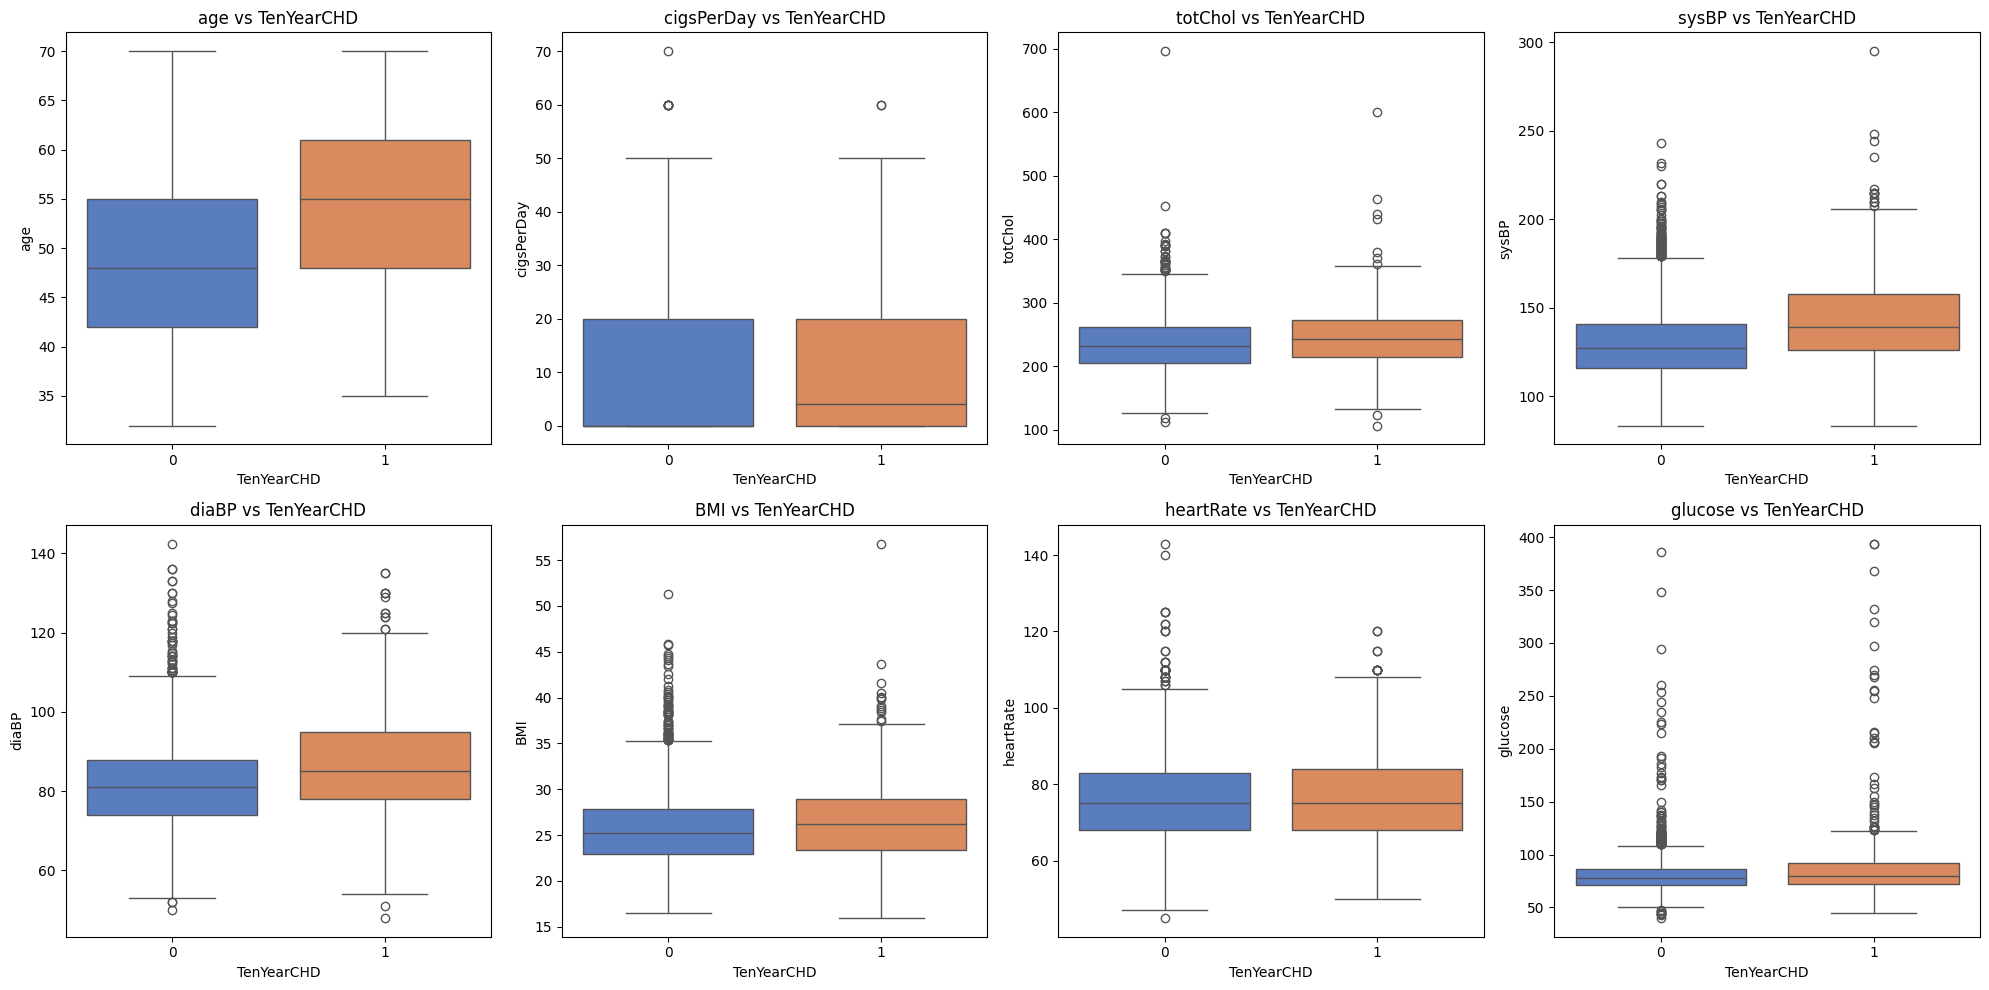

In [16]:

fig, axs = plt.subplots(2, 4, figsize=(20, 10)) 

for i, col in enumerate(numeric_columns):
    row, col_index = divmod(i, 4) 
    sns.boxplot(x=target_column, y=col, data=training_data, ax=axs[row, col_index], palette="muted")
    axs[row, col_index].set_title(f'{col} vs {target_column}')
    axs[row, col_index].set_xlabel(target_column)
    axs[row, col_index].set_ylabel(col)

plt.tight_layout()
plt.show()



The boxplots show that individuals with TenYearCHD = 1 are generally older and have higher systolic (sysBP) and diastolic (diaBP) blood pressure compared to those without the condition.

 Cholesterol (totChol) and glucose levels also tend to be slightly higher in the TenYearCHD = 1 group, suggesting a link to increased heart disease risk. 
 
 Smoking behavior (cigsPerDay) and BMI exhibit similar distributions across both groups, indicating these factors may not strongly differentiate heart disease risk in this dataset. Further statistical analysis could help clarify these relationships.

In [17]:
correlation_with_target = training_data.corr()['TenYearCHD'].sort_values(ascending=False)

correlation_with_target

TenYearCHD         1.000000
age                0.224927
sysBP              0.212703
prevalentHyp       0.166544
glucose            0.138200
diaBP              0.135979
diabetes           0.103681
totChol            0.094306
BPMeds             0.088020
prevalentStroke    0.068627
BMI                0.066947
cigsPerDay         0.066778
is_smoking         0.034143
heartRate          0.020241
education         -0.052751
sex               -0.084647
Name: TenYearCHD, dtype: float64

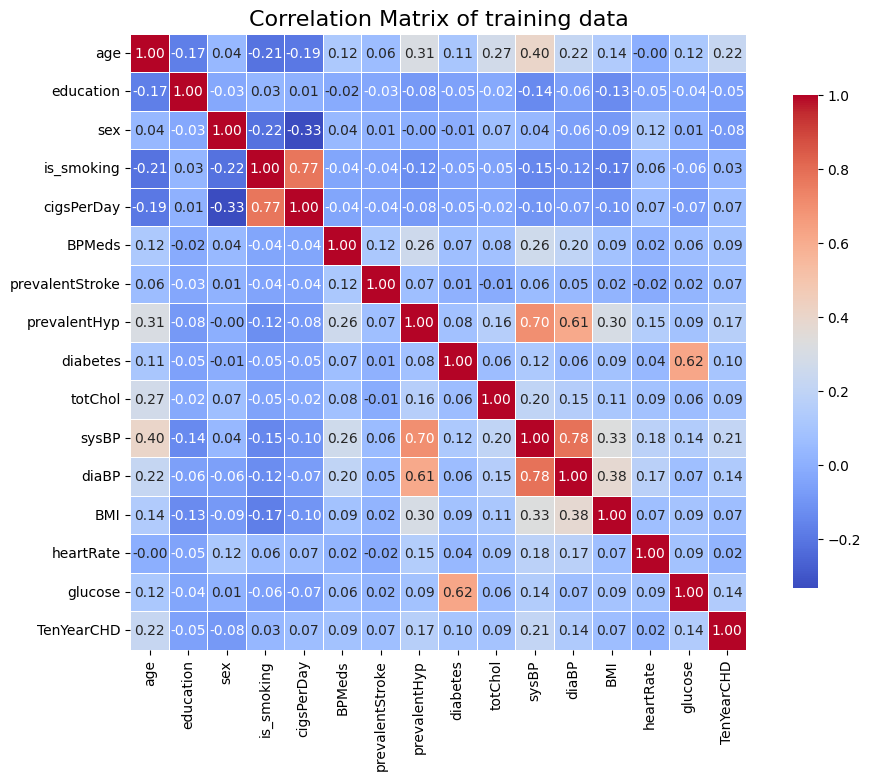

In [18]:
correlation_matrix = training_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,  
    cmap='coolwarm', 
    fmt='.2f',  
    linewidths=0.5,  
    cbar_kws={'shrink': 0.8},  
    square=True 
)
plt.title('Correlation Matrix of training data', fontsize=16)
plt.show()


I observed that age and sysBP (systolic blood pressure) are the most positively correlated features with the target variable TenYearCHD, showing correlations of 0.22 and 0.21, respectively, indicating their potential importance in predicting cardiovascular risk.

Interestingly, prevalentHypertension, diabetes, and glucose also exhibit moderate positive correlations (above 0.10), suggesting their role in influencing the likelihood of developing CHD over ten years.

Features like education, sex, and heartRate have very low or negative correlations with TenYearCHD, highlighting that these variables might not significantly contribute to the model and could either be dropped or transformed if included.

**However, for this model we will be using all the features and not dropping any column**

## 5. Data Preprocessing


Earlier it was observed that some columns have missing values which will undergo imputing now

In [19]:
training_data.isna().sum()

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [20]:
data_cleaned = training_data.copy()

num_cols = ['cigsPerDay', 'totChol', 'BMI', 'heartRate', 'glucose']

cat_cols = ['education', 'BPMeds']

num_imputer = SimpleImputer(strategy='mean')
data_cleaned[num_cols] = num_imputer.fit_transform(data_cleaned[num_cols])

cat_imputer = SimpleImputer(strategy='most_frequent')
data_cleaned[cat_cols] = cat_imputer.fit_transform(data_cleaned[cat_cols])

print(data_cleaned.isna().sum())


age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


In [21]:
num_columns = data_cleaned[['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']].columns.tolist()
cat_columns = data_cleaned[['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']].columns.tolist()
target_column = data_cleaned['TenYearCHD']

In [22]:
data_cleaned['TenYearCHD']

0       1
1       0
2       0
3       1
4       0
       ..
3385    0
3386    0
3387    1
3388    0
3389    0
Name: TenYearCHD, Length: 3390, dtype: int64

In [23]:
if isinstance(target_column, pd.DataFrame):
    target_column = target_column.iloc[:, 0]

In [24]:
data_cleaned[num_columns].describe()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,3390.000000,3390.000000,3390.000000,3390.00000,3390.000000,3390.000000,3390.000000,3390.000000
mean,49.542183,9.069477,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520
std,8.592878,11.840458,44.993041,22.29203,12.023581,4.106939,11.970102,23.131808
min,32.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000
25%,42.000000,0.000000,206.000000,117.00000,74.500000,23.030000,68.000000,72.000000
50%,49.000000,0.000000,235.000000,128.50000,82.000000,25.400000,75.000000,80.000000
75%,56.000000,20.000000,264.000000,144.00000,90.000000,27.997500,83.000000,85.000000
max,70.000000,70.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000


### Scaling the Numeric variables

In [25]:

scaler = MinMaxScaler()
scaler.fit(data_cleaned[num_columns])

data_cleaned[num_columns] = scaler.transform(data_cleaned[num_columns])


First, we `fit` the scaler to the data 

In [26]:
scaler.fit(data_cleaned[num_columns])

MinMaxScaler()

Then transform the numeric columns

In [27]:

data_cleaned[num_columns] = scaler.transform(data_cleaned[num_columns])

We can now verify that values in each column lie in the range $(0,1)$

In [28]:
data_cleaned[num_columns].describe()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000
mean,0.461636,0.129564,0.220839,0.232157,0.369133,0.240817,0.316095,0.118888
std,0.226128,0.169149,0.076389,0.105400,0.127234,0.100562,0.122144,0.065344
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.263158,0.000000,0.168081,0.158392,0.280423,0.173115,0.234694,0.090395
50%,0.447368,0.000000,0.217317,0.212766,0.359788,0.231146,0.306122,0.112994
75%,0.631579,0.285714,0.266553,0.286052,0.444444,0.294748,0.387755,0.127119
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



The **MinMaxScaler** ensures that all numerical features in the dataset are normalized to a range of [0, 1], improving model performance by standardizing feature magnitudes. This transformation is applied only to numerical columns, while categorical features remain unaltered, preserving their interpretability and meaning.

### One hot encoding on the education column

In [29]:
data_cleaned = pd.get_dummies(data_cleaned, columns=['education'], drop_first=True)


In [30]:
data_cleaned

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,education_2.0,education_3.0,education_4.0
0,0.842105,2,1,0.042857,0.0,0,0,0,0.193548,0.304965,0.391534,0.240817,0.459184,0.112994,1,True,False,False
1,0.105263,1,0,0.000000,0.0,0,1,0,0.178268,0.399527,0.529101,0.338149,0.275510,0.098870,0,False,False,True
2,0.368421,2,1,0.142857,0.0,0,0,0,0.242784,0.153664,0.243386,0.107493,0.438776,0.152542,0,False,False,False
3,0.473684,1,1,0.285714,0.0,0,1,0,0.213922,0.352246,0.423280,0.301175,0.234694,0.152542,1,False,False,False
4,0.842105,2,1,0.428571,0.0,0,0,0,0.227504,0.250591,0.391534,0.256121,0.255102,0.104520,0,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,0.736842,2,0,0.000000,0.0,0,0,0,0.261460,0.189125,0.328042,0.326151,0.255102,0.177966,0,False,False,False
3386,0.368421,2,0,0.000000,0.0,0,0,0,0.156197,0.087470,0.084656,0.146915,0.357143,0.124294,0,False,False,False
3387,0.315789,1,1,0.042857,0.0,0,1,0,0.415959,0.380615,0.751323,0.317336,0.285714,0.090395,1,False,True,False
3388,0.736842,1,0,0.000000,0.0,0,1,0,0.142615,0.394799,0.603175,0.172625,0.357143,0.127119,0,False,False,False


### Splitting the data into train and validation set

In [31]:
X = data_cleaned.drop('TenYearCHD', axis=1)
y= data_cleaned['TenYearCHD']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 6. Model Building

In [33]:
model = LogisticRegression(class_weight= 'balanced')
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [34]:

test_preds = model.predict(X_test)
train_preds = model.predict(X_train)

In [35]:
train_probs= model.predict_proba(X_train)[:, 1]
test_probs= model.predict_proba(X_test)[:, 1]

 Logistic regression model is trained with **balanced class weights** to handle any potential class imbalance, ensuring the model gives appropriate attention to both classes. The model is evaluated by generating predictions for both the training and test datasets, allowing us to assess its performance. Additionally, the predict_proba method provides the probability of the positive class, which can be used for a more nuanced evaluation of the model's confidence in its predictions. This enables a better understanding of model behavior, especially in situations where classification thresholds might be adjusted.

## 7. Model Evaluation
Now let us check the metrics of of my model such as accuracy, precision and recall

In [36]:
train_accuracy = accuracy_score(y_train, train_preds)
train_precision = precision_score(y_train, train_preds)
train_recall = recall_score(y_train, train_preds)
train_F1 = f1_score(y_train, train_preds)


print("\nTraining Metrics:")
print(f"Accuracy Score: {train_accuracy * 100:.2f}%")
print(f"Precision Score: {train_precision * 100:.2f}%")
print(f"Recall Score: {train_recall * 100:.2f}%")
print(f"F1 Score: {train_F1 * 100:.2f}%")



Training Metrics:
Accuracy Score: 66.62%
Precision Score: 26.63%
Recall Score: 67.68%
F1 Score: 38.22%


### Training Metrics

The **accuracy score of 66.62%** indicates that the model correctly predicted the class for 66.62% of the training samples. While this might seem like a decent accuracy, it doesn’t fully reflect the model's ability to distinguish between the positive and negative classes, especially in the case of imbalanced datasets.


The **precision score of 26.63%** suggests that when the model predicts a positive class, it is correct only 26.63% of the time. This indicates that the model is incorrectly labeling a significant number of negative instances as positive (false positives). The low precision score highlights a potential issue with the model’s ability to reliably identify positive cases.


A **recall score of 67.68%** indicates that the model successfully captures 67.68% of the actual positive instances. While this is a better performance than precision, it suggests that the model is still missing a notable portion of the positives (false negatives), which could be problematic depending on the application.


The **F1 score of 38.22%** is a harmonic mean of precision and recall, providing a balanced evaluation of the model’s performance. Given the low precision score, the F1 score reflects the trade-off between precision and recall, indicating room for improvement in the model's ability to both correctly predict positives and avoid false positives.

In [37]:
confusion_matrix(y_train,train_preds, normalize='true')

array([[0.6643461 , 0.3356539 ],
       [0.32320442, 0.67679558]])

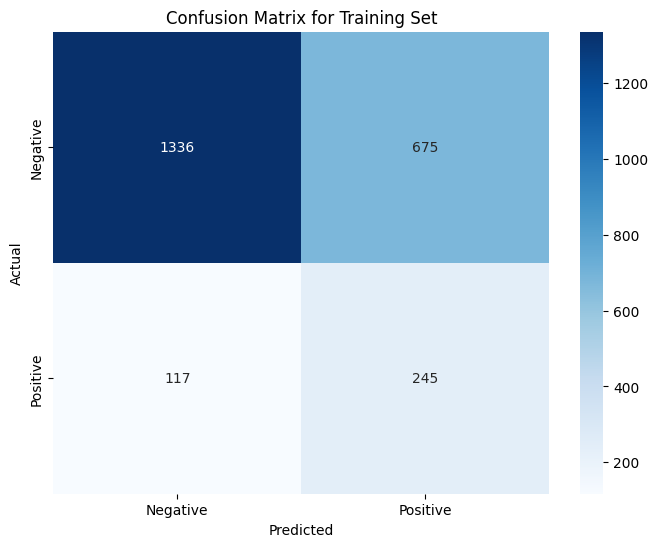

In [38]:
cm = confusion_matrix(y_train, train_preds)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix for Training Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Confusion Matrix for Training Set
The confusion matrix suggests that the model performs better at identifying the positive class with a higher true positive rate. However, the model still struggles with false positives and false negatives, pointing to the need for further refinement to improve accuracy in predicting both classes.

### Metrics for the Testing set

In [44]:
# Calculating metrics for validation set
accuracy = accuracy_score(y_test, test_preds)
precision = precision_score(y_test, test_preds)
recall = recall_score(y_test, test_preds)
f1 = f1_score(y_test, test_preds)  # Use y_test for validation F1 score

print("\nTesting Metrics:")
print(f"Accuracy Score: {accuracy*100:.2f}%")
print(f"Precision Score: {precision *100:.2f}%")
print(f"Recall Score: {recall *100:.2f}%")
print(f"F1 Score: {f1 *100:.2f}%")  # Corrected the variable name


Testing Metrics:
Accuracy Score: 67.75%
Precision Score: 25.75%
Recall Score: 63.76%
F1 Score: 36.68%


### Testing Metrics

The **accuracy score of 67.75%** indicates that the model correctly predicted the class for 67.75% of the test samples. While the accuracy is slightly better than the training accuracy, it still doesn't reflect how well the model distinguishes between the positive and negative classes, especially in the context of imbalanced datasets.


The **precision score of 25.75%** means that when the model predicts the positive class, it is correct only 25.75% of the time. This suggests a significant issue with the model's ability to reliably identify positive instances, as many of the predicted positives are actually false positives.

A **recall score of 63.76%** indicates that the model correctly identified 63.76% of the actual positive instances in the test set. While this is an improvement compared to the precision, it still suggests that the model is missing a considerable portion of the true positive cases, which could lead to missed opportunities or risks in applications where identifying positive cases is critical.

The **F1 score of 36.68%** reflects a balance between precision and recall, showing that the model struggles with both false positives and false negatives. The relatively low F1 score highlights the need for improvement in the model's ability to correctly predict positives while minimizing errors.

In [40]:
confusion_matrix(y_test, test_preds, normalize='true')

array([[0.6843318 , 0.3156682 ],
       [0.36241611, 0.63758389]])

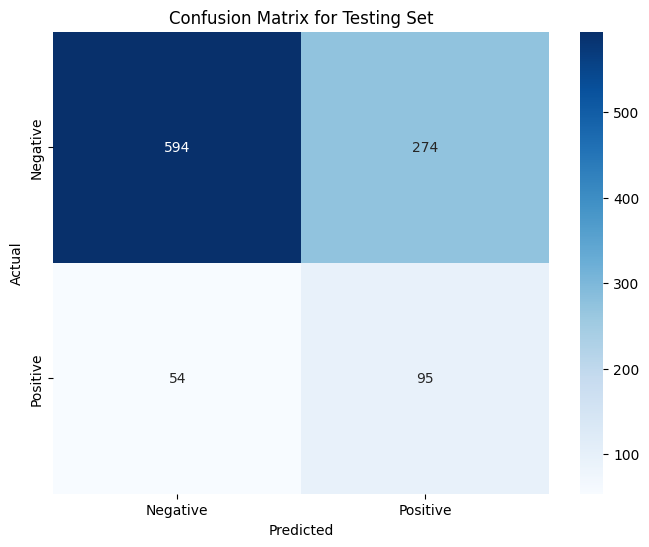

In [45]:
cm = confusion_matrix(y_test, test_preds)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix for Testing Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Confusion Matrix for Testing Set
The confusion matrix indicates that the model is still biased toward predicting the negative class, with a relatively low number of true positives. The high rate of false negatives emphasizes the need for further adjustments to improve recall and reduce the number of missed positive instances.

Given the relatively higher recall but low precision, adjusting the decision threshold ( from the default 0.5) using precision-recall curves can help reduce false positives, increase precision, and maintain an acceptable recall balance.

## 8. Optimal Threshold

In [42]:
precision, recall, thresholds = precision_recall_curve(y_test, test_probs)

f1_scores = 2 * (precision * recall) / (precision + recall)
optimal_threshold_index = f1_scores.argmax()
optimal_threshold = thresholds[optimal_threshold_index]

print(f"Optimal Threshold: {optimal_threshold}")


Optimal Threshold: 0.5429061174253468


The **optimal threshold of 0.543** suggests that classifying samples as positive when the predicted probability exceeds 0.543 results in the best balance between precision and recall, maximizing the F1 score. This threshold enables the model to effectively identify positive cases while minimizing false positives, ensuring the most reliable overall performance.

### Testing the Optimal Threshold calculated

In [46]:
threshold = 0.543
test_preds_thresholded = (test_probs > threshold).astype(int)

accuracy = accuracy_score(y_test, test_preds_thresholded)
precision = precision_score(y_test, test_preds_thresholded)
recall = recall_score(y_test, test_preds_thresholded)
f1 = f1_score(y_test, test_preds_thresholded)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.7316
Precision: 0.2933
Recall: 0.5906
F1 Score: 0.3920


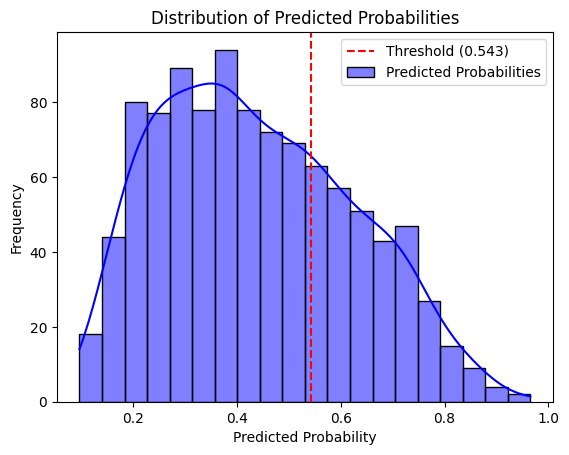

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot predicted probabilities
sns.histplot(test_probs, kde=True, color="blue", label="Predicted Probabilities", bins=20)
plt.axvline(threshold, color="red", linestyle="--", label="Threshold (0.543)")
plt.title("Distribution of Predicted Probabilities")
plt.xlabel("Predicted Probability")
plt.ylabel("Frequency")
plt.legend()
plt.show()


## 9. Model Interpretation

The model, tested using an optimal threshold of 0.543, demonstrates the following performance metrics:

- **Accuracy**: 73.16%
- **Precision**: 29.33%
- **Recall**: 59.06%
- **F1 Score**: 39.20%

The accuracy of 73.16% suggests that the model is able to correctly classify a good portion of the test data. However, it’s important to note that accuracy alone doesn’t fully capture the model’s ability to differentiate between the classes, especially in cases with imbalanced data.

- **Precision**: The precision score of 29.33% indicates that only about 29% of the positive predictions are correct, which is quite low. This suggests that the model is generating a significant number of false positives when predicting the positive class.
  
- **Recall**: With a recall of 59.06%, the model correctly identifies 59% of the true positive cases. While this is moderate, the recall is not as high as expected, meaning the model is still missing a fair number of true positives.

- **F1 Score**: The F1 score of 39.20% reflects the trade-off between precision and recall, and it confirms the model’s suboptimal performance in identifying the positive class.

Overall, these metrics highlight a key challenge: while the model is doing reasonably well at capturing some of the positive cases (Class 1), the precision is still quite low, meaning many of the predictions for Class 1 are false positives. This weak performance is particularly important in applications where false positives are costly or undesirable. 

### Recommendations for Improvement:
1. **Threshold Adjustment**: While the recall is moderate, the low precision suggests that the model might be over-predicting positives. Adjusting the decision threshold could help reduce false positives, thereby improving precision, without sacrificing too much recall.
   
2. **Model Improvement**: Further investigation into other models or ensemble techniques might be worthwhile, as they can better handle class imbalance and improve both precision and recall for Class 1 (Positive).


